# Computer vision with Pytorch

Author: Alejandro Meza

## What can be a computer vision problem?

- Binary classification: Determine if an image contains a pizza or not. Just as simple as that lol.

- Multiclass classification: determine whether we have sushi, pizza, burgers or not food. Obviouly the model will have difference level of performance depending on the class.

- Object detection: detect some car with a specific plate.

- Object segmentation: segment certain portion of an image.

Some examples:
- Tesla computer vision: use cameras to understand what's going on, transform the images into vector, and determine what to do.

## What are we going to cover in this cool notebook?

- Getting a vision dataset to work with using torchvision.datasets
- Architecture of a CNN with PyTorch
- And end-to-end multiclass problem
- Steps in modelling with CNNs with PyTorch


## Basic flow of a CV problem
- turn the images into tensors
- pass the images to the model
- obtain probabilities for each class, and determine the predicted class with the class that is assigned to the biggest probability

** some architectures like transformers also performs good with images!!

## Normal shapes that we are going to found in our dataset

- [batch_size, width, height, number_of_colour_channels]


## work flow

- get_data -> select model+loss_function+optimizer --> fit the model... and so on.

## what is a CNN?

A convolutional neural network (CNN) is a category of machine learning model, namely a type of deep learning algorithm well suited to analyzing visual data.

# Architecture of a CNN

- Input image -> target images you would like to discover patterns in
- Input layer -> takes in target images and preprocess them to further layers
- Convolution layer -> Extract/learn the most important things about the image
- Hidden activation/ non-linear activation -> Adds non-linearity to learned features
- Pooling layer -> reduces the dimensionality of learned features
- Output layer/linear layer -> takes learned features and output them in shape of target labels
- Output activation -> convert output logits to prediction probabilities




## 0. Computer vision libraries in Python

TORCHVISION
- torchvision.datasets --> get datasets
- torchvision.models --> get pre-trained models
- torchvision.transforms --> functions for manipulating your vision data (images) to be suitable for use with a ML model
- torch.utils.data.Dataset --> base dataset class for pytorch
- torch.utils.data.Dataloader --> iterable over a dataset


In [ ]:
import torch
from torch import nn

#import torchvision
import torchvision
import torchvision.datasets as datasets #to get a DS to work with
import torchvision.transforms as transforms
from torchvision.transforms import ToTensor #convert a PIL image or numpy.Arrat to tensor --> to use in our model

#import matplotlib for visualization
import matplotlib.pyplot as plt

#check versions
print(torch.__version__)
print(torchvision.__version__)

2.5.0+cu121
0.20.0+cu121


## 1. Getting a dataset

The dataset that we are going to use is Fashion MNIST. MNIST is one of the most famous datasets in the world of computer vision.


In [ ]:
# setup train data
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

# setup test data
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

100%|██████████| 26.4M/26.4M [00:02<00:00, 12.8MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 201kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.77MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 11.3MB/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
#see the first training example
image, label = train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

So we can see a tensor of form (CxHxW), and a label with the value of 9.

In [ ]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
# check the shape
image.shape, label

(torch.Size([1, 28, 28]), 9)

So since the toTorch transformation transform an Image to a tensor with the shapes: (CxHxW), that means that:
- Colors: only 1 channel
- 28x28 image

## Visualize our data

<class 'torch.Tensor'> <class 'int'>
Image shape: torch.Size([1, 28, 28]), Label: 9


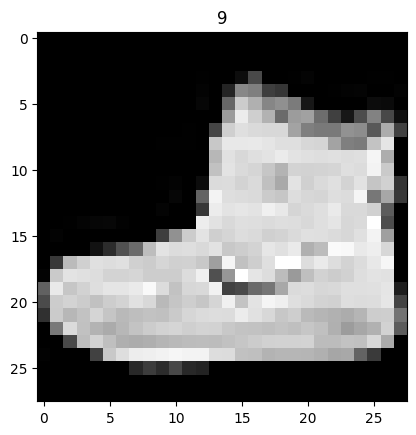

In [ ]:
import matplotlib.pyplot as plt
image,label = train_data[0]
print(type(image),type(label))
print(f"Image shape: {image.shape}, Label: {label}")
#use squeeze to remove the first dimension
plt.title(label)
plt.imshow(image.squeeze(), cmap="gray")
plt.show()

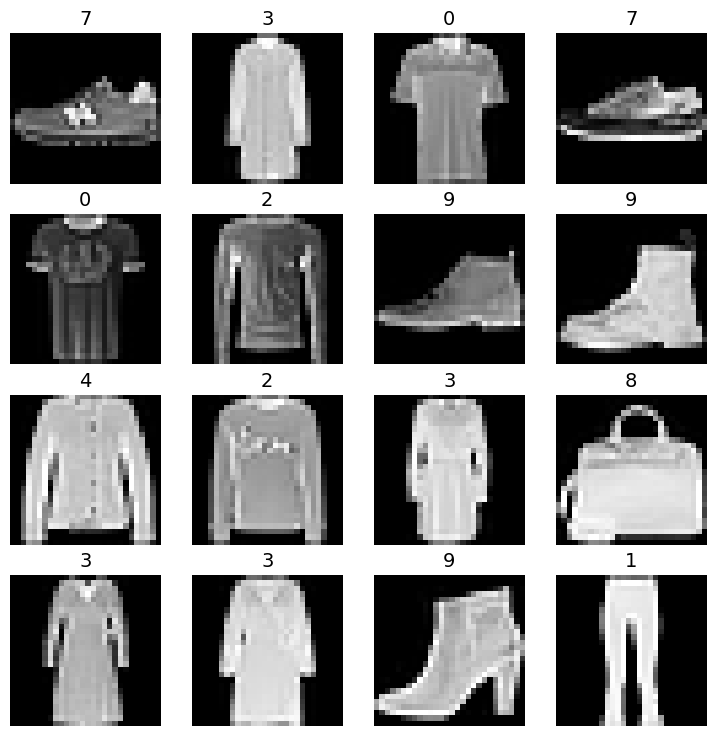

In [ ]:
#how can we see the images in a random way? Let's say some samples!
#torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    image, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(image.squeeze(), cmap="gray")
    plt.title(label, fontsize=14)
    plt.axis(False)

## 2. Creating data loaders

Turns our dataset into a python iterable. More specifically, we want to turn our data into minibatches.

Why would we do this?

- 1. It is more computionally efficient, as in, in your computing HW may not be able to look (store in memory) at 6000 images in one hit. So we break it down to 32 images at a time (batch size of 32).

- 2. It gives our NN more chances to update its gradient per epoch.

In [ ]:
#let's see our data
train_data,test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [ ]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32 #define our batch size
train_dataloader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True,drop_last=True)
#don't shuffle test data in order to make it easier to evaluate the model performance
test_dataloader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle=False,drop_last=True)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7b71310bb0d0>,
 <torch.utils.data.dataloader.DataLoader at 0x7b707161bbb0>)

In [ ]:
#let's what we have created
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} / batches of {BATCH_SIZE}")
print(f"Length of train dataloader: {len(test_dataloader)} / batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7b71310bb0d0>, <torch.utils.data.dataloader.DataLoader object at 0x7b707161bbb0>)
Length of train dataloader: 1875 / batches of 32
Length of train dataloader: 312 / batches of 32


So, we can see that although the training dataset contains 60000 datapoints, it showed to us that we have only 1875 train loaders. The reason? Because we have divided the data into 32 groups -as well as known as batches-.

In [ ]:
#let's see how to interact with a batch...
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

Feature batch shape: torch.Size([32, 1, 28, 28])
Labels batch shape: torch.Size([32])


So, the output's meaning of ([32, 1, 28, 28]) is:
- 32 groups of (1,28,28) images.
- Since we have 1--> grayscale image


Image shape: torch.Size([1, 28, 28]), Label: 0


(-0.5, 27.5, 27.5, -0.5)

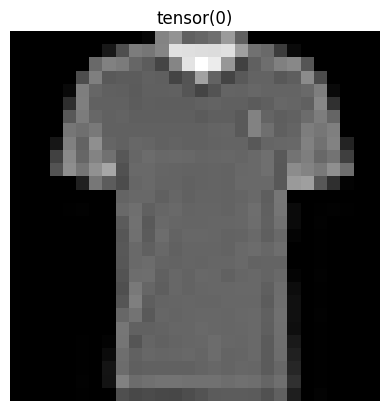

In [ ]:
#show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features), size=[1]).item()
image, label = train_features[random_idx], train_labels[random_idx]
print(f"Image shape: {image.shape}, Label: {label}")
plt.title(label)
plt.imshow(image.squeeze(), cmap="gray")
plt.axis(False)

## Build our baseline model

When starting to build a series of machine learning modelling experiments, it's best practice to start with a baseline models.

A baseline model is a simple model you will try and improve upon with subsequent models/experiments.

In other words: start simply and add complexity when necessary.

In [ ]:
#create a flatten model
flatten_model = nn.Flatten() #flatten layer

#get a simple sample
x = train_features[0]
print(f'Shape without perform flatten operation{x.shape}')

#flatten the sample
x = flatten_model(x) #[color_channels x Widht x Height] --> condense into a single vector space
x.shape

Shape without perform flatten operationtorch.Size([1, 28, 28])


torch.Size([1, 784])

In [ ]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
      super().__init__()
      self.layer_stack = nn.Sequential(
          nn.Flatten(), #flatten the input vector
          nn.Linear(in_features=input_shape,
                    out_features=hidden_units),
          nn.Linear(in_features=hidden_units,
                    out_features=output_shape)
      )
    def forward(self, x):
      return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)
#define our model
model_0 = FashionMNISTModelV0(input_shape=x.shape[1], #the dimension of the input image in the flatten form
                              hidden_units=10,
                              output_shape=10)
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x = torch.rand([1,1,28,28]) #batch of 1 , with an image of dimensions of (1,28,28)
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

### 3.1 Setup loss, optimizer and evaluation metrics

* Loss function --> our loss function will be 'nn.CrossEntropyLoss()'
* Optimizer --> torch.optim.SGD()
* Evaluation metric --> accuracy

In [ ]:
import requests
from pathlib import Path

#download helper function
if Path('helper_functions.py').is_file():
  print('already exists')
else:
  request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
  with open('helper_functions.py', 'wb') as f:
    f.write(request.content)

In [ ]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred))*100
  return acc

In [ ]:
# Import accuracy metric
from helper_functions import accuracy_fn

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

### 3.2 Creating a function to time our experiments

Machine learning is very experimental.

Two of the main things you will often want to track are:
1. Model's performance (loss and accuracy values)
2. How fast it runs


In [ ]:
from timeit import default_timer as timer

def print_train_time(start: float,
                    end: float,
                    device: torch.device = None):
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

### Create training loop and training a model with batches of data

1. Loop through epocs
2. Loop trough training batches, perform training steps, calculate the loss per batch.
3. Loop through testing batches, perform testing steps, calculate the loss per batch.
4. Print out what is happening.

In [ ]:
# set the progress bar
from tqdm.auto import tqdm

# set the seed and the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# set the number of epochs
epochs = 3

# create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")

  ### training
  train_loss = 0
  train_acc = 0
  #train for each batches
  for batch, (image,label) in enumerate(train_dataloader):
    model_0.train()
    #1.Forward pass
    y_pred = model_0(image)

    #2. Calculate the loss
    loss = loss_fn(y_pred, label)
    train_loss += loss

    #3. optimizer
    optimizer.zero_grad()

    #4. loss backward
    loss.backward()

    #5. optimizer step
    optimizer.step()

    #calculate the accuracy
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)

    if batch % 400 == 0:
      print(f"Looked at {batch*len(image)}/{len(train_dataloader.dataset)} samples")
      print(f"Train Loss: {loss}, Train Acc: {accuracy_fn(label, y_pred_class)}")

  #Divide total train loss by length of train dataloader
  train_loss /= len(train_dataloader)

  ### Testing
  test_loss, test_acc = 0,0
  model_0.eval()
  with torch.inference_mode():
    for image, label in test_dataloader:
      #1.forward pass
      test_pred = model_0(image)

      #2.calculate the loss
      test_loss += loss_fn(test_pred, label)

      #3.calculate the accuracy
      test_acc += accuracy_fn(y_true = label,
                              y_pred = test_pred.argmax(dim=1))

    #calculate the loss per batch
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

  print(f"Train loss: {train_loss}, Test loss: {test_loss}, Test_acc: {test_acc}")

#calculate the training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Train Loss: 2.366476535797119, Train Acc: 9.375
Looked at 12800/60000 samples
Train Loss: 0.6423890590667725, Train Acc: 71.875
Looked at 25600/60000 samples
Train Loss: 0.5696731209754944, Train Acc: 81.25
Looked at 38400/60000 samples
Train Loss: 0.3812875747680664, Train Acc: 90.625
Looked at 51200/60000 samples
Train Loss: 0.3490268588066101, Train Acc: 93.75
Train loss: 0.5903892517089844, Test loss: 0.5101830363273621, Test_acc: 82.02123397435898
Epoch: 1
-------
Looked at 0/60000 samples
Train Loss: 0.379928857088089, Train Acc: 84.375
Looked at 12800/60000 samples
Train Loss: 0.6835907101631165, Train Acc: 71.875
Looked at 25600/60000 samples
Train Loss: 0.3863295912742615, Train Acc: 84.375
Looked at 38400/60000 samples
Train Loss: 0.6464133858680725, Train Acc: 75.0
Looked at 51200/60000 samples
Train Loss: 0.2691584825515747, Train Acc: 90.625
Train loss: 0.4763319194316864, Test loss: 0.4805448353290558, Test_acc: 83.1630608974359


## Make predictions and get Model O results


In [ ]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  loss, acc = 0,0
  model.eval()

  with torch.inference_mode():
    for image, label in tqdm(data_loader):
      #1. forward pass
      y_pred = model(image)

      #2. calculate the loss
      loss += loss_fn(y_pred, label)
      acc += accuracy_fn(y_true=label,
                          y_pred=y_pred.argmax(dim=1))

    #scale loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

    return {"model_name":model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}

model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)

model_0_results

  0%|          | 0/312 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4771095812320709,
 'model_acc': 83.39342948717949}

## Setup device agnostic-code (for using GPU, in the case some GPU is available)

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
torch.cuda.is_available()

False

In [ ]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

## Model 1: Building a better model with non-linearity


In [ ]:
from torch import nn
class FashionMNISTModelV1(nn.Module):

    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
      super().__init__()
      self.layer_stack = nn.Sequential(
          nn.Flatten(), #flatten the input vector
          nn.Linear(in_features=input_shape,
                    out_features=hidden_units),
          nn.ReLU(), #add non-linearity to our model
          nn.Linear(in_features=hidden_units,
                    out_features=output_shape),
          nn.ReLU() #our final non-linear layer
      )

    def forward(self, x):
      return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784,
                              hidden_units=10,
                              output_shape=10).to(device)
model_1

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [ ]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [ ]:
# set the progress bar
from tqdm.auto import tqdm

# set the seed and the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# set the number of epochs
epochs = 10

# create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")

  ### training
  train_loss = 0
  train_acc = 0
  #train for each batches
  for batch, (image,label) in enumerate(train_dataloader):
    model_1.train()
    #1.Forward pass
    y_pred = model_1(image)

    #2. Calculate the loss
    loss = loss_fn(y_pred, label)
    train_loss += loss

    #3. optimizer
    optimizer.zero_grad()

    #4. loss backward
    loss.backward()

    #5. optimizer step
    optimizer.step()

    #calculate the accuracy
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)

    if batch % 400 == 0:
      print(f"Looked at {batch*len(image)}/{len(train_dataloader.dataset)} samples")
      print(f"Train Loss: {loss}, Train Acc: {accuracy_fn(label, y_pred_class)}")

  #Divide total train loss by length of train dataloader
  train_loss /= len(train_dataloader)

  ### Testing
  test_loss, test_acc = 0,0
  model_1.eval()
  with torch.inference_mode():
    for image, label in test_dataloader:
      #1.forward pass
      test_pred = model_1(image)

      #2.calculate the loss
      test_loss += loss_fn(test_pred, label)

      #3.calculate the accuracy
      test_acc += accuracy_fn(y_true = label,
                              y_pred = test_pred.argmax(dim=1))

    #calculate the loss per batch
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

  print(f"Train loss: {train_loss}, Test loss: {test_loss}, Test_acc: {test_acc}")

#calculate the training time
train_time_end_on_cpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_1.parameters()).device))

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Train Loss: 2.313370943069458, Train Acc: 9.375
Looked at 12800/60000 samples
Train Loss: 1.2257366180419922, Train Acc: 56.25
Looked at 25600/60000 samples
Train Loss: 1.1645071506500244, Train Acc: 68.75
Looked at 38400/60000 samples
Train Loss: 1.055192470550537, Train Acc: 62.5
Looked at 51200/60000 samples
Train Loss: 1.0799914598464966, Train Acc: 68.75
Train loss: 1.091991901397705, Test loss: 0.9572303891181946, Test_acc: 64.9639423076923
Epoch: 1
-------
Looked at 0/60000 samples
Train Loss: 0.7563356757164001, Train Acc: 71.875
Looked at 12800/60000 samples
Train Loss: 1.0559438467025757, Train Acc: 59.375
Looked at 25600/60000 samples
Train Loss: 0.6937853097915649, Train Acc: 78.125
Looked at 38400/60000 samples
Train Loss: 0.8131114840507507, Train Acc: 71.875
Looked at 51200/60000 samples
Train Loss: 0.5605740547180176, Train Acc: 78.125
Train loss: 0.7810057997703552, Test loss: 0.7233068943023682, Test_acc: 73.8681891025641
Epo

In [ ]:
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)

model_1_results

  0%|          | 0/312 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.43324095010757446,
 'model_acc': 84.81570512820512}

**Note:** Sometimes, depending on your data/hw you might find that your model trains faster on CPU than GPU.

Why is this?
- It could be due the overhead of copying data/model to and from the GPU.
- The hardware youre using has a better CPU in terms of computer capability than the GPU.

For more on how to make your models compute faster, see here: https://horace.io/brrr_intro.html

In [ ]:
# Get model_1 results dictionary
model_1_results = eval_model(
        model=model_1,
        data_loader=test_dataloader,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
)
model_1_results

  0%|          | 0/312 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.43324095010757446,
 'model_acc': 84.81570512820512}

## Model 2: Building a Convolutional Neural Network (CNN)

- Simple CNN:

 [IMAGE] --> [Processed inputs] --> {Convolutional layers --> ReLU --> Pooling} Layer --> Linear Output Layer

 https://poloclub.github.io/cnn-explainer/

** The more layers you add, the more patterns you can find in your data.


In [ ]:
#Create a convolutional neuronal network
class FashionMNISTModelV2(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
      super().__init__()
      #a block is a group of layers
      self.conv_block_1 = nn.Sequential(
          #create a conv-layer
          nn.Conv2d(in_channels=input_shape,
                    out_channels=hidden_units,
                    kernel_size=3,
                    stride=1,
                    padding=1),
          nn.ReLU(), #layer to apply non-linearity
          nn.Conv2d(in_channels=hidden_units,
                    out_channels=hidden_units,
                    kernel_size=3,
                    stride=1,
                    padding=1),
          nn.ReLU(), #layer to apply non-linearity
          nn.MaxPool2d(kernel_size=2)
      )
      self.conv_block_2 = nn.Sequential(
          nn.Conv2d(in_channels=hidden_units,
                    out_channels=hidden_units,
                    kernel_size=3,
                    stride=1,
                    padding=1),
          nn.ReLU(), #layer to apply non-linearity
          nn.Conv2d(in_channels=hidden_units,
                    out_channels=hidden_units,
                    kernel_size=3,
                    stride=1,
                    padding=1),
          nn.ReLU(), #layer to apply non-linearity
          nn.MaxPool2d(kernel_size=2)
      )
      self.classifier = nn.Sequential(
          nn.Flatten(),
          #there is a trick to calculate this part
          nn.Linear(in_features=hidden_units*49,  #we have to adapt this value depending the output of layer 2
                    out_features=output_shape)
      )

    def forward(self, x):
      x = self.conv_block_1(x)
      #print(f'Shape of block 1: {x.shape}')
      x = self.conv_block_2(x)
      #print(f'Shape of block 2: {x.shape}')
      x = self.classifier(x)
      #print(f'Shape of classifier: {x.shape}')
      return x

In [ ]:
torch.manual_seed(42)
#input channels = number of channels of the image
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=10).to(device)
model_2

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
#define an image to test our image
rand_image_tensor = torch.randn(size=(1,28,28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [ ]:
model_2(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], grad_fn=<AddmmBackward0>)

## stepping through nn.conv2D

Applies a 2D convolution over an input signal composed of several input planes.

In [ ]:
torch.manual_seed(42)

#create a batch of imagres
images = torch.rand(size=(32,3,64,64)) #[batch_size, color_channels, height, width]
test_image = images[0]

print(images.shape)
print(test_image.shape)
print(f"Min: {test_image.min()}, Max: {test_image.max()}")

torch.Size([32, 3, 64, 64])
torch.Size([3, 64, 64])
Min: 5.46574592590332e-05, Max: 0.9998791813850403


In [ ]:
#create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3, #number of channels of the input image
                     out_channels=10, #the same number as the output classes
                     kernel_size=(3,3), #in this case, the kernel size is a 3x3 kernel --> have a huge impact in the output
                     stride=1, #pixels that are 'skipped' in the convolution operation
                     padding=0) #in order to deal with the pixels located in the corner

#pass the data through the convolution layer
conv_output = conv_layer(test_image)
#print(conv_output)
print(f"conv_output shape: {conv_output.shape}")
print(conv_output.shape)

conv_output shape: torch.Size([10, 62, 62])
torch.Size([10, 62, 62])


## Stepping through nn.MaxPool2d()

One of the goals of this layer is to reduce dimensionallity. In order to achieve this, it obtains the maximum of a certain region MxN of the image.

In [ ]:
test_image.shape

torch.Size([3, 64, 64])

In [ ]:
#create a sample maxpool2d layer
maxpool_layer = nn.MaxPool2d(kernel_size=2)
print(f'Test image data shape: {test_image.shape}')
#pass the data through to convlyaer
test_image_through_conv = conv_layer(test_image)
print(f'Test_img conv2d shape: {test_image_through_conv.shape}')
maxpool_output = maxpool_layer(test_image_through_conv)
print(f'Test_img maxpool shape: {maxpool_output.shape}')

Test image data shape: torch.Size([3, 64, 64])
Test_img conv2d shape: torch.Size([10, 62, 62])
Test_img maxpool shape: torch.Size([10, 31, 31])


## Train our CNN model (set-up parameters and use training loop)

In [ ]:
#set up loss/eval function
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

In [ ]:
# set the progress bar
from tqdm.auto import tqdm

# set the seed and the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# set the number of epochs
epochs = 3

# create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")

  ### training
  train_loss = 0
  train_acc = 0
  #train for each batches
  for batch, (image,label) in enumerate(train_dataloader):
    model_2.train()
    #1.Forward pass
    y_pred = model_2(image)

    #2. Calculate the loss
    loss = loss_fn(y_pred, label)
    train_loss += loss

    #3. optimizer
    optimizer.zero_grad()

    #4. loss backward
    loss.backward()

    #5. optimizer step
    optimizer.step()

    #calculate the accuracy
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)

    if batch % 400 == 0:
      print(f"Looked at {batch*len(image)}/{len(train_dataloader.dataset)} samples")
      print(f"Train Loss: {loss}, Train Acc: {accuracy_fn(label, y_pred_class)}")

  #Divide total train loss by length of train dataloader
  train_loss /= len(train_dataloader)

  ### Testing
  test_loss, test_acc = 0,0
  model_2.eval()
  with torch.inference_mode():
    for image, label in test_dataloader:
      #1.forward pass
      test_pred = model_2(image)

      #2.calculate the loss
      test_loss += loss_fn(test_pred, label)

      #3.calculate the accuracy
      test_acc += accuracy_fn(y_true = label,
                              y_pred = test_pred.argmax(dim=1))

    #calculate the loss per batch
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

  print(f"Train loss: {train_loss}, Test loss: {test_loss}, Test_acc: {test_acc}")

#calculate the training time
train_time_end_on_cpu = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_2.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Train Loss: 2.3012287616729736, Train Acc: 15.625
Looked at 12800/60000 samples
Train Loss: 0.5884524583816528, Train Acc: 71.875
Looked at 25600/60000 samples
Train Loss: 0.5129066705703735, Train Acc: 78.125
Looked at 38400/60000 samples
Train Loss: 0.33648136258125305, Train Acc: 87.5
Looked at 51200/60000 samples
Train Loss: 0.3956245481967926, Train Acc: 84.375
Train loss: 0.5865315198898315, Test loss: 0.3933195471763611, Test_acc: 85.99759615384616
Epoch: 1
-------
Looked at 0/60000 samples
Train Loss: 0.3458539545536041, Train Acc: 87.5
Looked at 12800/60000 samples
Train Loss: 0.6037007570266724, Train Acc: 71.875
Looked at 25600/60000 samples
Train Loss: 0.25784745812416077, Train Acc: 90.625
Looked at 38400/60000 samples
Train Loss: 0.37461012601852417, Train Acc: 81.25
Looked at 51200/60000 samples
Train Loss: 0.23244404792785645, Train Acc: 90.625
Train loss: 0.3623140752315521, Test loss: 0.35801467299461365, Test_acc: 86.6586538

In [ ]:
#get some results of the model
model_2_results = eval_model(model=model_2,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)

print(model_0_results)
print(model_2_results)

  0%|          | 0/312 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0', 'model_loss': 0.4771095812320709, 'model_acc': 83.39342948717949}
{'model_name': 'FashionMNISTModelV2', 'model_loss': 0.32174715399742126, 'model_acc': 88.00080128205128}


## Compare mdoel results and training time

In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_2_results])
compare_results['model_time'] = [total_train_time_model_0,
                                 total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,model_time
0,FashionMNISTModelV0,0.477110,83.393429,28.445050
1,FashionMNISTModelV2,0.321747,88.000801,112.847407


In [ ]:
compare_results.columns

Index(['model_name', 'model_loss', 'model_acc', 'model_time'], dtype='object')

#visualize our model results

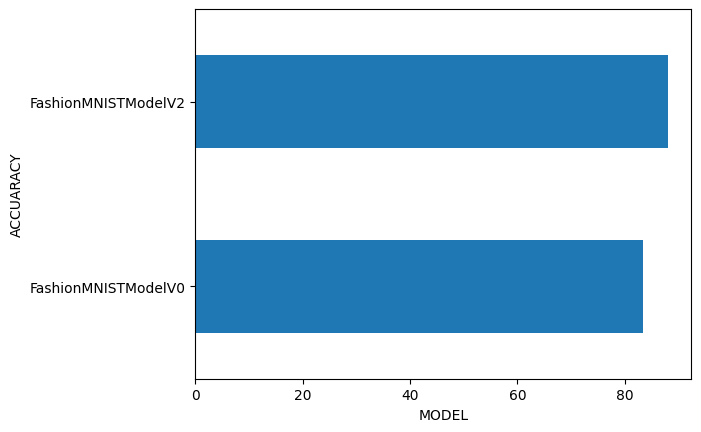

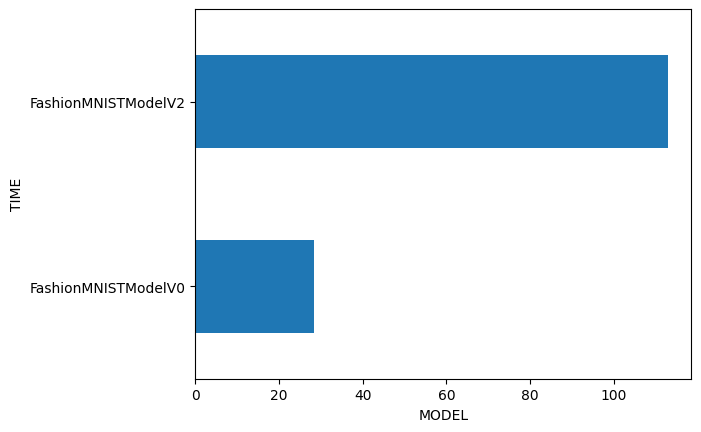

In [ ]:
compare_results.set_index('model_name')['model_acc'].plot(kind='barh')
plt.xlabel('MODEL')
plt.ylabel('ACCUARACY')
plt.show()
print()
compare_results.set_index('model_name')['model_time'].plot(kind='barh')
plt.xlabel('MODEL')
plt.ylabel('TIME')
plt.show()

## Make and evaluate random predictions with the best model

**matplotlib does not work on GPU

In [ ]:
def make_predictions(model: torch.nn.Module,
                    data: list,
                    device: torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      #prepare the sample
      sample = torch.unsqueeze(sample, dim=0).to(device)
      #forward pass
      pred_logit = model(sample)
      #get prediction probabilities
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
      pred_probs.append(pred_prob.cpu())
  #stack the predictions to turn list into tensor
  return torch.stack(pred_probs)

In [ ]:
import random
random.seed(10)
test_samples= []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
  #obtain image and label
  test_samples.append(sample)
  test_labels.append(label)

torch.Size([1, 28, 28])


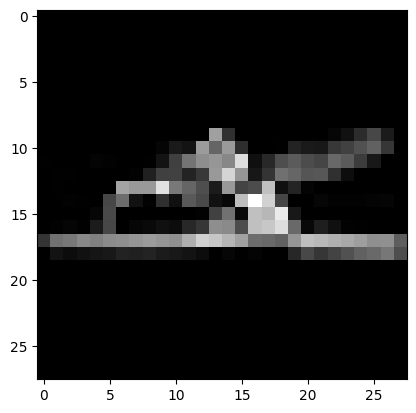

In [ ]:
#view the first sample shape
print(test_samples[0].shape)
plt.imshow(test_samples[0].squeeze(), cmap='gray')

In [ ]:
#make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples)
pred_probs[:10]

tensor([[7.3921e-05, 1.2321e-05, 1.1402e-05, 1.0162e-03, 2.9042e-06, 9.9627e-01,
         4.7459e-05, 1.5339e-03, 5.1427e-04, 5.1748e-04],
        [9.3455e-04, 1.0670e-06, 2.3695e-04, 2.4675e-06, 5.8308e-05, 2.5946e-06,
         1.6022e-03, 3.5661e-05, 9.9710e-01, 2.8192e-05],
        [1.0646e-02, 3.9908e-03, 2.3698e-01, 1.5759e-04, 5.9386e-01, 1.0883e-02,
         1.2421e-01, 2.5887e-05, 1.1076e-02, 8.1755e-03],
        [1.6350e-02, 3.4400e-05, 4.2522e-03, 1.0491e-04, 5.4278e-01, 7.4461e-06,
         4.3120e-01, 5.7099e-06, 5.2411e-03, 2.2161e-05],
        [9.6028e-01, 6.9617e-07, 3.1387e-04, 1.8811e-04, 2.3478e-05, 2.3485e-08,
         3.9186e-02, 7.3846e-08, 7.0216e-06, 6.7510e-08],
        [7.5306e-03, 1.1007e-03, 8.3072e-01, 4.3330e-04, 1.2095e-01, 1.0682e-04,
         3.7503e-02, 1.0898e-04, 1.3454e-03, 1.9727e-04],
        [6.8824e-04, 3.9866e-06, 2.8398e-04, 6.3526e-06, 1.0248e-04, 1.0227e-05,
         3.4735e-03, 4.9833e-04, 9.9491e-01, 2.3046e-05],
        [1.2958e-03, 1.9063

So, the output that we are seeing, is the prediction for the first 10 elements in the test_samples. As we can see, we have obtained 10 different numbers as an output for each prediction. In other words, that is the probability of each class. So, in order to obtain the predicted label, we have to obtain the index of the biggest probability.

In [ ]:
#convert prediction probs into lables
pred_class = pred_probs.argmax(dim=1).tolist()
pred_class

[5, 8, 4, 4, 0, 2, 8, 4, 3]

In [ ]:
print(f'Real labels: {test_labels[:10]}')

Real labels: [5, 8, 6, 6, 0, 2, 8, 4, 3]


In [ ]:
print(pred_class)

[5, 8, 4, 4, 0, 2, 8, 4, 3]


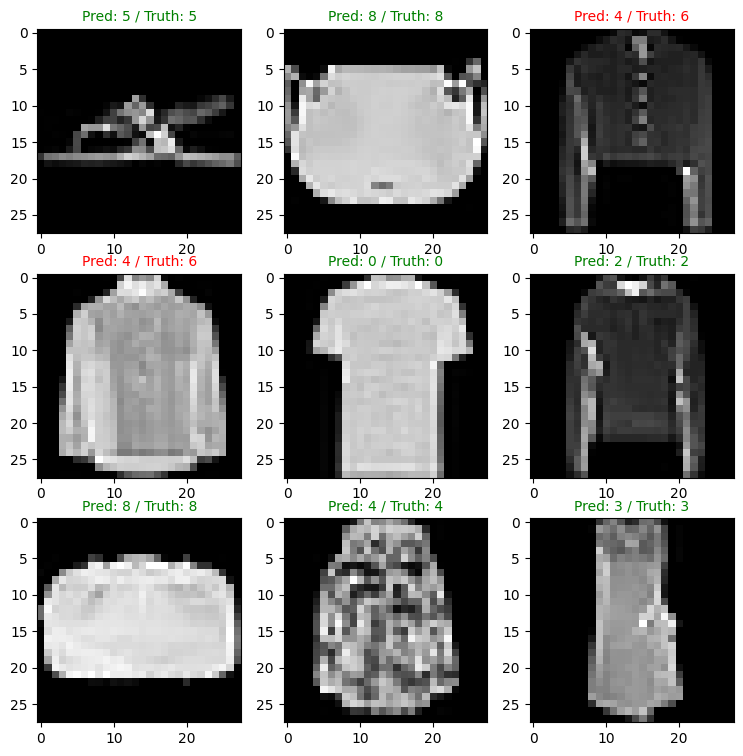

In [ ]:
plt.figure(figsize=(9,9))
nrows,ncols = 3,3
for i, sample in enumerate(test_samples):
  #create a subplot
  plt.subplot(nrows, ncols, i+1)
  #plot the target image
  plt.imshow(sample.squeeze(), cmap='gray')
  #Find the prediction
  prediction = pred_class[i]
  #obtain the thruth label
  truth_label = test_labels[i]
  #create a title for the plot
  title_text = f"Pred: {prediction} / Truth: {truth_label}"

  #check if the prediction is good or not
  if prediction == truth_label:
    plt.title(title_text,fontsize=10,c='g')
  else:
     plt.title(title_text,fontsize=10,c='red')


## **Make a confusion matrix**

A confusion matrix is a fantastic way of evaluating your classification models.

1. Make predictions with our trained model on the test dataset.
2. Make a confusion matrix
3. Plot the confusion matrix

In [ ]:
import mlxtend
from mlxtend.plotting import plot_confusion_matrix

In [ ]:
from tqdm.auto import tqdm

#make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for image, label in tqdm(test_dataloader, desc='Making predictions...'):
    image,label = image.to(device), label.to(device)
    #do the forward pass
    y_pred = model_2(image)
    #turn the predictions from logits --> prediction probabilities
    y_pred = torch.softmax(y_pred.squeeze(), dim=0).argmax(dim=1)
    #append to the list
    y_preds.append(y_pred.cpu())

#concatenate list of predictions into a tensor form
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:3]

Making predictions...:   0%|          | 0/312 [00:00<?, ?it/s]

tensor([9, 2, 1])

In [ ]:
print(f'Number of predictions: {len(y_pred_tensor)}')

Number of predictions: 9984


In [ ]:
#to try to show the matrix and avoid the current bug, just add random numbers to the list
# Generate 16 random integers from 0 to 9
random_numbers = torch.randint(0, 10, (16,))

# Append the random numbers to the existing tensor
y_pred_tensor = torch.cat((y_pred_tensor, random_numbers))
print(len(y_pred_tensor))

10000


In [ ]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 890.6/890.6 kB 24.8 MB/s eta 0:00:00


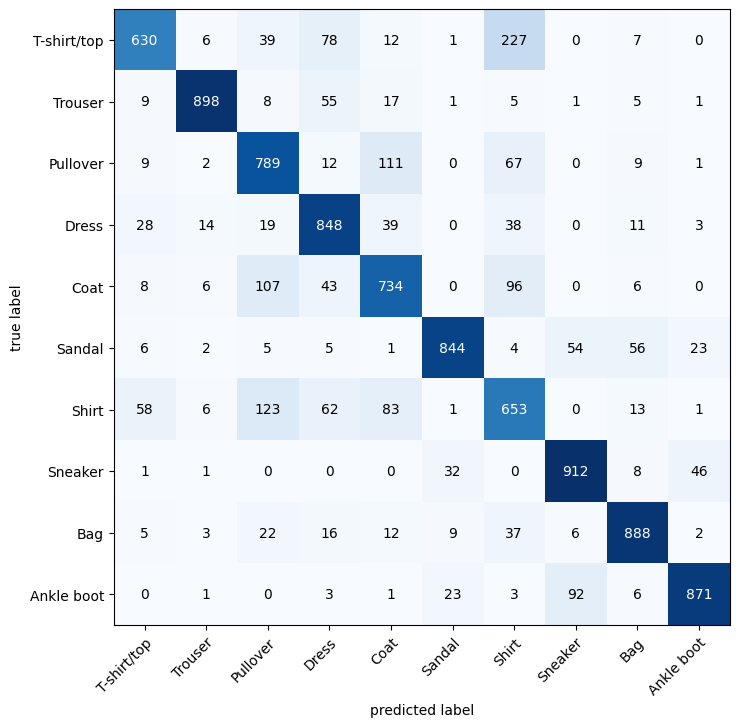

In [ ]:
from torchmetrics import ConfusionMatrix

#2.Setup confusion instance and comprare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_to_idx),
                        task='multiclass')
confmat_tensor = confmat(preds = y_pred_tensor,
                         target = test_data.targets)

#3.Plot a confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=confmat_tensor.numpy(), #matplotlib uses numpy
                              class_names = list(class_to_idx.keys()),
                              figsize=(8,8)
                              )

We can see the matrix in order to understand the model behaviour.

## Save and load the best performing model

In [ ]:
from pathlib import Path

#create model dictory path
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

#create model save path
MODEL_NAME = '03_pytorch_computer_vision_model_2.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#save the model
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

In [ ]:
#load model
torch.manual_seed(42)
loaded_model = FashionMNISTModelV2(input_shape=1,
                                   hidden_units=10,
                                   output_shape=10)
#load in the state dict
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model.to(device)

<ipython-input-63-01fff61e5299>:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
#evaluate the loaded model
print(f'Previous model: {model_2_results}')

loaded_model_resulta = eval_model(model=loaded_model,
           data_loader=test_dataloader,
          loss_fn=loss_fn,
           accuracy_fn=accuracy_fn)

print(f'Loaded model results {loaded_model_resulta}')

Previous model: {'model_name': 'FashionMNISTModelV2', 'model_loss': 0.32174715399742126, 'model_acc': 88.00080128205128}


  0%|          | 0/312 [00:00<?, ?it/s]

Loaded model results {'model_name': 'FashionMNISTModelV2', 'model_loss': 0.32174715399742126, 'model_acc': 88.00080128205128}
